In [ ]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download('reuters')
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_

True

In [ ]:
import nltk
nltk.download('gutenberg')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#No of words in the corpus

In [ ]:
guten_words = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
print(guten_words, f"length: {len(guten_words)}")

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...] length: 37360


In [ ]:
# A list of words present in a text along with their immediate context.
concordance = nltk.Text(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))
concordance.concordance('Hamlet')

Displaying 25 of 100 matches:
                  [ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus
he Combate . In which , our Valiant Hamlet , ( For so this side of our knowne 
f the Article designe , His fell to Hamlet . Now sir , young Fortinbras , Of v
at we haue seene to night Vnto yong Hamlet . For vpon my life , This Spirit du
of Denmarke , Gertrude the Queene , Hamlet , Polonius , Laertes , and his Sist
ds Attendant . King . Though yet of Hamlet our deere Brothers death The memory
d it at thy will : But now my Cosin Hamlet , and my Sonne ? Ham . A little mor
 too much i ' th ' Sun Queen . Good Hamlet cast thy nightly colour off , And l
weet and commendable In your Nature Hamlet , To giue these mourning duties to 
Let not thy Mother lose her Prayers Hamlet : I prythee stay with vs , go not t
his gentle and vnforc ' d accord of Hamlet Sits smiling to my heart ; in grace
hunder . Come away . Exeunt . Manet Hamlet . Ham . Oh that this too too solid 
l . Doe you doubt that

# Raw text

In [ ]:
txt = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
print(txt[:500])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


In [ ]:
def vocab(words):
  has={}
  for i in range(len(words)):
    if words[i] not in has:
      has[words[i]]=i
  return has

In [ ]:
def search(s,words):
  for i in words:
    if i==s:
      return f"Word Found:{s}"
  return f"Word Not Found:{s}"

In [ ]:
def freq(words):
  has={}
  for i in range(len(words)):
    if words[i] not in has:
      has[words[i]]=1
    else:
      has[words[i]]+=1
  return has


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(has):
  plt.figure(figsize=(30,5))
  sns.barplot(x=list(has.keys()),y=list(has.values()))
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
def remove_stopwords(words):
  word=[]
  for i in words:
    if i not in set(stopwords.words("english")):
      word.append(i)
  return word

In [ ]:
stemmer=PorterStemmer()
lemat=WordNetLemmatizer()
def lemmatize(words):
  lem=[]
  for i in words:
    lem.append(lemat.lemmatize(i))
  return lem

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
def pos(words):
  pos_tags = nltk.pos_tag(words[:5])
  return pos_tags

In [ ]:
import spacy
from spacy import displacy
def ner(corpus):
  nlp=spacy.load("en_core_web_sm")
  doc=nlp(corpus)
  displacy.render(doc,style="ent",page=True)
  for ent in doc.ents:
    print(ent.text,"-",ent.label_)

In [ ]:
def main(words):
  print(vocab(words))
  s="Hamlet"
  print(search(s,words))
  has=freq(words)
  print(has)
  plot(has)
  print(remove_stopwords(words))
  print(lemmatize(words))
  print(pos(words))




{'[': 0, 'The': 1, 'Tragedie': 2, 'of': 3, 'Hamlet': 4, 'by': 5, 'William': 6, 'Shakespeare': 7, '1599': 8, ']': 9, 'Actus': 10, 'Primus': 11, '.': 12, 'Scoena': 13, 'Prima': 14, 'Enter': 16, 'Barnardo': 17, 'and': 18, 'Francisco': 19, 'two': 20, 'Centinels': 21, 'Who': 25, "'s": 26, 'there': 27, '?': 28, 'Fran': 29, 'Nay': 31, 'answer': 32, 'me': 33, ':': 34, 'Stand': 35, '&': 36, 'vnfold': 37, 'your': 38, 'selfe': 39, 'Bar': 40, 'Long': 42, 'liue': 43, 'the': 44, 'King': 45, 'He': 52, 'You': 55, 'come': 56, 'most': 57, 'carefully': 58, 'vpon': 59, 'houre': 61, "'T": 64, 'is': 65, 'now': 66, 'strook': 67, 'twelue': 68, ',': 69, 'get': 70, 'thee': 71, 'to': 72, 'bed': 73, 'For': 77, 'this': 78, 'releefe': 79, 'much': 80, 'thankes': 81, 'bitter': 85, 'cold': 86, 'And': 88, 'I': 89, 'am': 90, 'sicke': 91, 'at': 92, 'heart': 93, 'Barn': 94, 'Haue': 96, 'you': 97, 'had': 98, 'quiet': 99, 'Guard': 100, 'Not': 104, 'a': 105, 'Mouse': 106, 'stirring': 107, 'Well': 110, 'goodnight': 112, 'If':

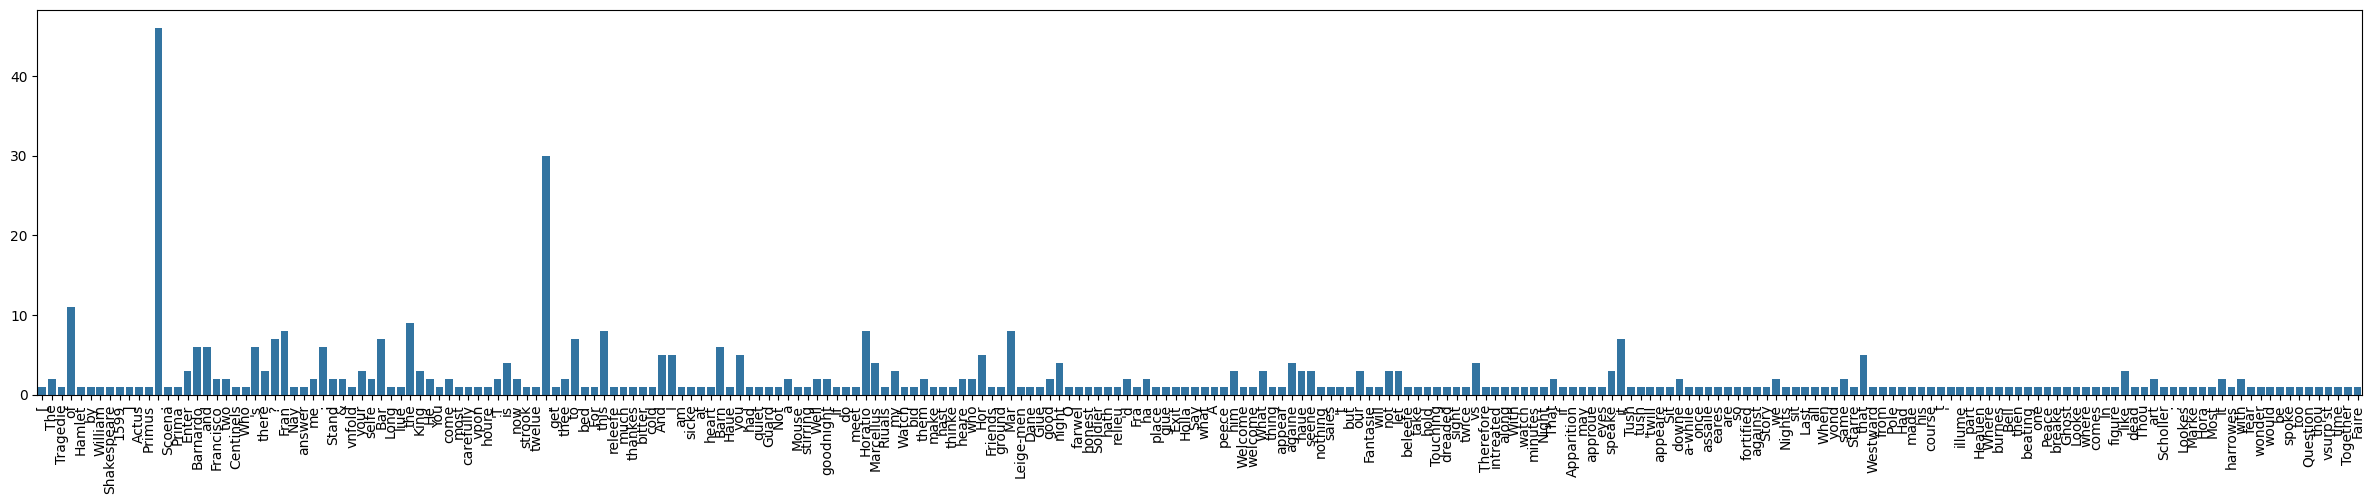

['[', 'The', 'Tragedie', 'Hamlet', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Barnardo', 'Francisco', 'two', 'Centinels', '.', 'Barnardo', '.', 'Who', "'s", '?', 'Fran', '.', 'Nay', 'answer', ':', 'Stand', '&', 'vnfold', 'selfe', 'Bar', '.', 'Long', 'liue', 'King', 'Fran', '.', 'Barnardo', '?', 'Bar', '.', 'He', 'Fran', '.', 'You', 'come', 'carefully', 'vpon', 'houre', 'Bar', '.', "'T", 'strook', 'twelue', ',', 'get', 'thee', 'bed', 'Francisco', 'Fran', '.', 'For', 'releefe', 'much', 'thankes', ':', "'T", 'bitter', 'cold', ',', 'And', 'I', 'sicke', 'heart', 'Barn', '.', 'Haue', 'quiet', 'Guard', '?', 'Fran', '.', 'Not', 'Mouse', 'stirring', 'Barn', '.', 'Well', ',', 'goodnight', '.', 'If', 'meet', 'Horatio', 'Marcellus', ',', 'Riuals', 'Watch', ',', 'bid', 'make', 'hast', '.', 'Enter', 'Horatio', 'Marcellus', '.', 'Fran', '.', 'I', 'thinke', 'I', 'heare', '.', 'Stand', ':', "'s", '?', 'Hor', '.', 'Friends', 'ground', 'Mar', '.', 'An

The Tragedie of Hamlet - WORK_OF_ART
William Shakespeare - PERSON
1599 - DATE
Actus - ORG
Scoena Prima - PERSON
Enter Barnardo - PERSON
Francisco - PERSON
two - CARDINAL
Barnardo - GPE
Stand & - ORG
the King

   Fran - PERSON
Francisco

   Fran - PERSON
Barn - PERSON


In [ ]:
guten_corpus=nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
from nltk.tokenize import word_tokenize
guten_words=word_tokenize(guten_corpus)
guten_words=guten_words[:500]
main(guten_words)
ner(guten_corpus[:500])